# 使用说明中文版

## 程序包的简介

该程序包的作用是用于寻找一维光子晶体平板中的BIC，您只需要给出光子晶体的光学参数，并且指定一个特殊的$k_x-\omega$空间或者$k_y-\omega$空间，我们就能够帮你找到这个空间中的BIC。由于是一维光子晶体，我们这里假设$x$方向就对应着周期方向。

该程序用到了几个常用的包：numpy, matplotlib, copy


## 使用步骤——一个案例
当要寻找平行波矢只存在于周期方向（也就是$x$方向，或者说纯粹的TE或者TM模式）的情况时，需要导入如下的模块

In [1]:
from bicks.crystalandnumber import PhotonicCrystalSlab, EssentialNumber
from bicks.bicsearch import FindBICs

- crystalandnumber中的PhotonicCrystalSlab是用于构造光子晶体（平板）的
- crystalandnumber中的EssentialNumber是用于指定搜寻BIC的$q-\omega$空间的
- bicky中的FindBICs就是用来寻找BIC的搜索器，适用于纯粹的TE以及TM模式的情况，这种情况下，场的平行波矢只有周期方向（这里是x的方向）

我们希望通过改变厚度，来寻找光子晶体平板中TE偏振的BIC，我们设一维光子晶体的介电常数分别为1和4.9（高斯制），两者各占一半（即填充率为0.5），进行如下操作可以生成我们希望得到的光子晶体：

In [4]:
fr = 0.5 # 填充率
ep = [1.0, 4.9] # 两种介电常数
phcs = PhotonicCrystalSlab(ep, fr) # 生成光子晶体平板，默认的厚度和周期都为1，整个程序以周期a为长度单位

我们可以通过使用如下的方法，查看光子晶体在一个周期内的空间分布

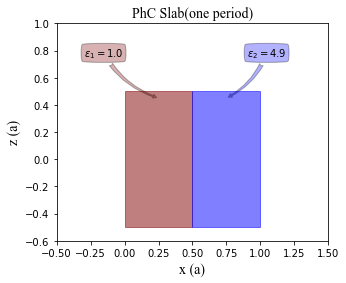

In [5]:
phcs.show()

接下来，您需要指定搜寻BIC的$k_x-\omega$空间，指定的方式就是告诉这个程序你想找的BIC在相应的$k_x-\omega$空间有多少个辐射通道

In [6]:
n_radiation_channel = 1 # 辐射通道的个数
num = EssentialNumber(n_radiation=n_radiation_channel) # 创建一个“必要数字”的实例，这是划分区域的关键

在开始搜寻之前，还有最后一步，就是指定偏振模式，这里我们是TE偏振，指定好了后，就可以构建一个BIC搜寻器的实例：

In [7]:
mode = "E" # 设置为TE偏振，如果要设置为TM偏振请键入"H"
fb = FindBICs(phcs, num, mode=mode) # 由光子晶体、划分的区域以及偏振模式构建的BIC搜寻器

Initializing:
100%[**************************************************->]19.91s

初始化需要耗时20s的样子，请耐心等待一会儿。

初始化结束后，您需要计算实现相干全反射时的反射相位，反射相位的计算是为后面变参数寻找BIC服务的：

In [8]:
 fb.getcoeffs() # 将反射相位记录到内存中


Initialization accomplished.
Computing:
100%[**************************************************->]15.20s
Computation accomplished.


反射相位的计算需要耗时20s的样子，请耐心等待一会儿，现在我们通过改变光子晶体平板的厚度参数来寻找BIC：

In [9]:
hstart = 1.0 # 厚度的下限
hend = 5.0 # 厚度的上限
Nh = 50 # 遍历厚度的个数
fb.run(hstart, hend, Nh=Nh) # 让我们开始寻找吧!

Searching:
100%[**************************************************->]1.93s
Search accomplished.
Number of BICs found:  208


当遍历的个数不是很多的时候，寻找花费的时间几乎可以忽略掉，现在，您可以读取该程序寻找到的BIC，相关的BIC的信息被记录到搜索器的几个属性里面：

In [11]:
bic_q = fb.bic_qs # BICs' Bloch q, in unit 2*Pi/a
bic_k0 = fb.bic_k0s # BICs' wave number, in unit 2*Pi/a
bic_h = fb.bic_hs # BICs' thickness, in unit a

这里我们随便给一个厚度对应的BIC：

In [12]:
i = 3
print("for thickness: " + str
      (bic_h[i]))
print("==========")
print("q: ", bic_q[i])
print("k0: ", bic_k0[i])

for thickness: 1.3265306122448979
q:  [0.094, 0.28200000000000003]
k0:  [0.6267381091888207, 0.47873810918882054]


这说明对于这样的一个厚度，它在相应的$q-\omega$空间找到两个BIC，我们需要注意一下单位，厚度的单位是 $a$，$q$ 的单位是 $2\pi/a$, $k_0$ 的单位是 $2\pi/a$($k_0=\omega/c$，所以可以认为波数$k_0$就代表了频率)。

当然，我们也设计好了可视化：

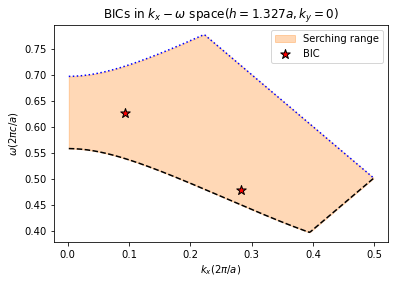

In [13]:
fb.showbic(i) # i对应着第几个厚度